In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv("CocoaPrice.csv")

In [37]:
df

,Date,Price
0,1994-10-01,1447.95
1,1994-11-01,1437.05
2,1994-12-01,1399.43
3,1995-01-01,1468.86
4,1995-02-01,1510.55
...,...,...
349,2023-11-01,3799.15
350,2023-12-01,3897.04
351,2024-01-01,4087.54
352,2024-02-01,5226.12


In [38]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [39]:
df.isnull().values.any()

False

In [41]:
# Creating a time series object

df['Date'] = pd.to_datetime(df['Date'])

# Next, set the 'Date' column as the index
df = df.set_index('Date')

# Now, you have a time series object
time_series = df['Price']

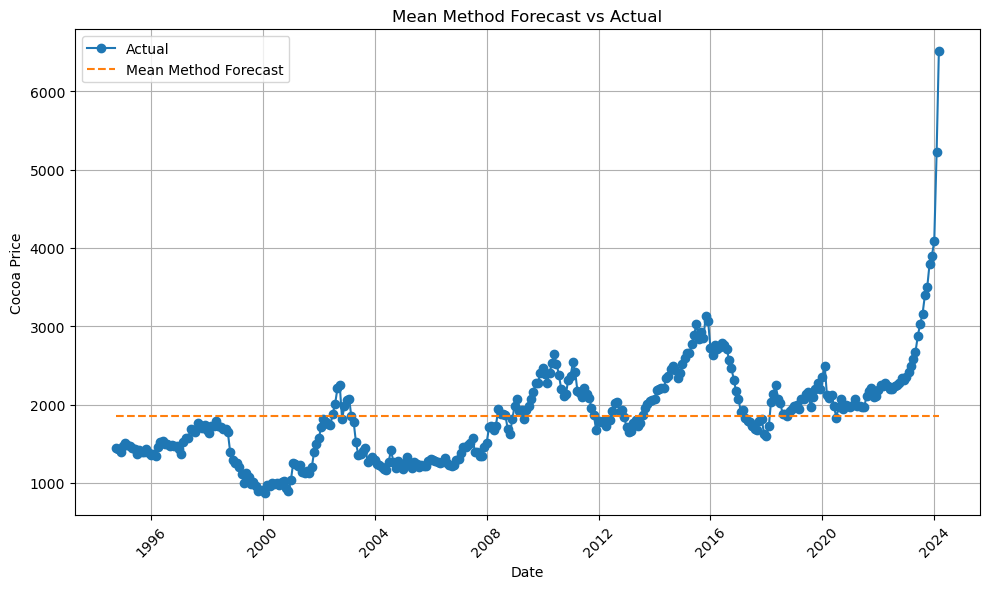

In [75]:
# Calculate the mean of the entire data
mean_value = df['Price'].mean()

# Repeat the mean value for the length of the data to generate the forecast
mean_forecast_values = np.full_like(df['Price'], fill_value=mean_value)

# Plot the mean forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, mean_forecast_values, label='Mean Method Forecast', linestyle='--')
plt.title('Mean Method Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


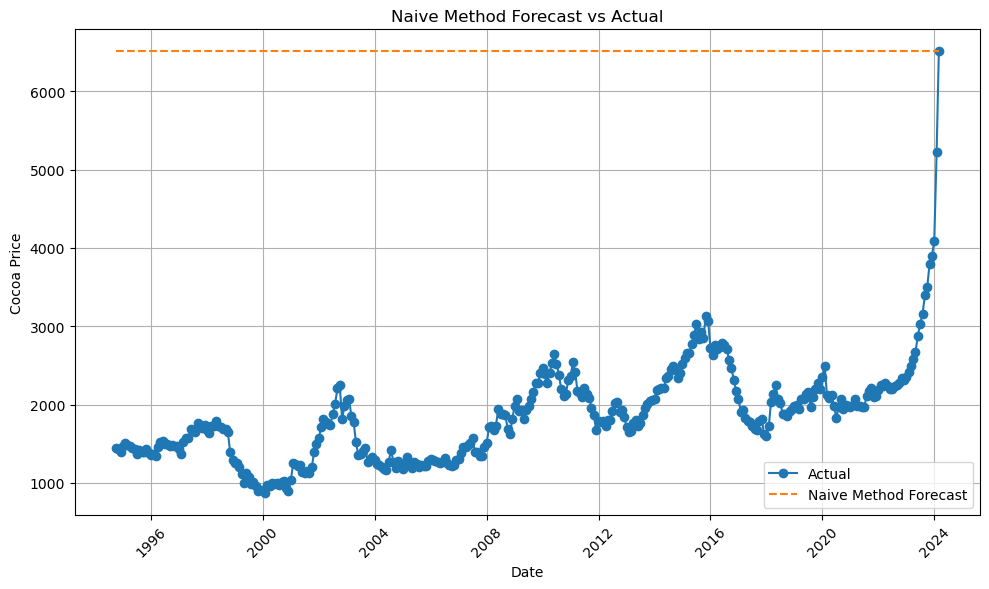

In [76]:
# Extract the last observed price
last_observation = df['Price'].iloc[-1]

# Repeat the last observed price for the length of the data to generate the forecast
naive_forecast_values = np.full_like(df['Price'], fill_value=last_observation)

# Plot the naive forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, naive_forecast_values, label='Naive Method Forecast', linestyle='--')
plt.title('Naive Method Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


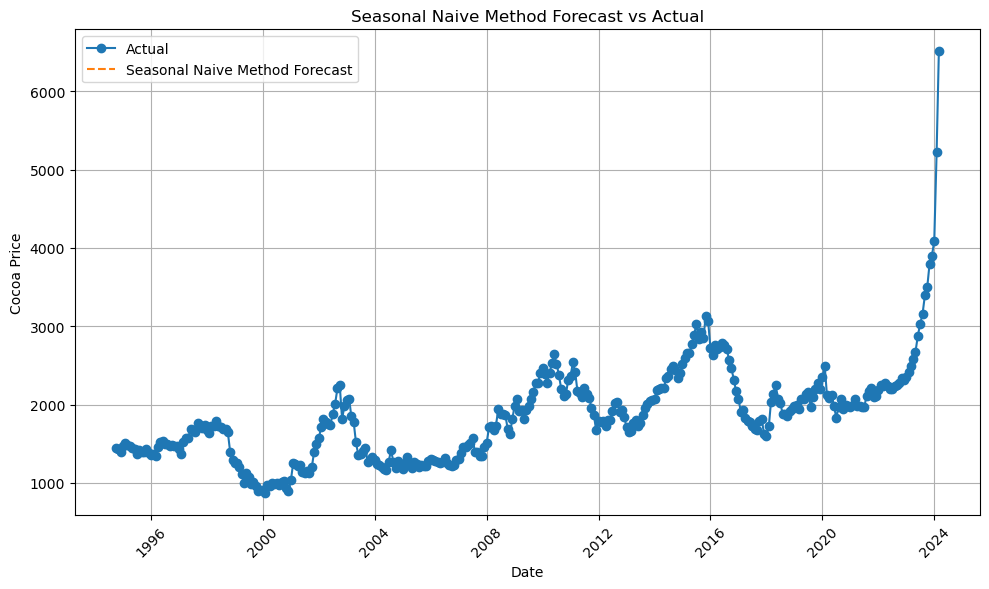

In [77]:
import pandas as pd

# Convert the index to datetime if it's not already in datetime format
df.index = pd.to_datetime(df.index)

# Extract the last observed price for each month
last_observation_monthly = df.groupby(df.index.month)['Price'].tail(1)

# Create a mapping of month to last observed price
last_observation_monthly_dict = last_observation_monthly.to_dict()

# Create a new column to store the seasonal naive forecast
df['Seasonal Naive Forecast'] = df.index.month.map(last_observation_monthly_dict)

# Plot the seasonal naive forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, df['Seasonal Naive Forecast'], label='Seasonal Naive Method Forecast', linestyle='--')
plt.title('Seasonal Naive Method Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


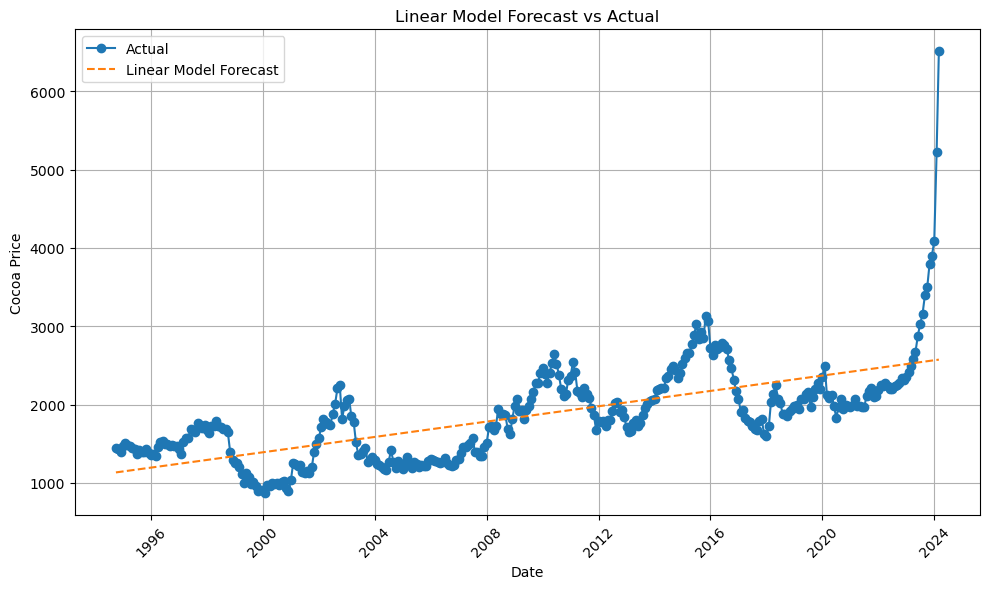

In [80]:
#Linear Model

from sklearn.linear_model import LinearRegression
import numpy as np

# Create a dataframe with a column for time index
df['TimeIndex'] = range(1, len(df) + 1)

# Split the data into features (X) and target variable (y)
X = df[['TimeIndex']]
y = df['Price']

# Fit linear regression model
linear_model = LinearRegression().fit(X, y)

# Forecast using the linear regression model
linear_forecast_values = linear_model.predict(X)

# Plot the linear model forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, linear_forecast_values, label='Linear Model Forecast', linestyle='--')
plt.title('Linear Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


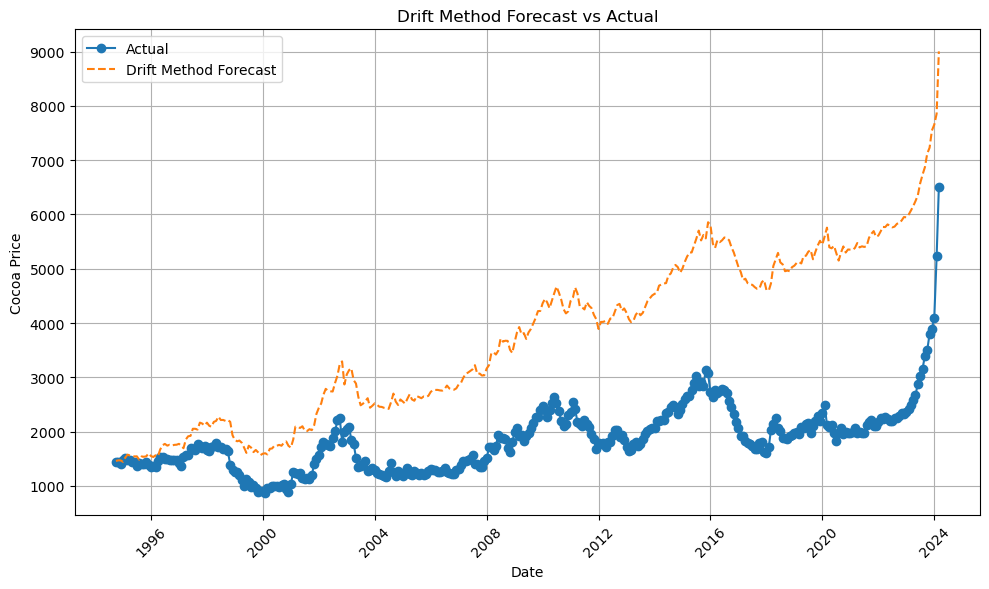

In [79]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
ses_model = SimpleExpSmoothing(df['Price']).fit()

# Get the forecast values from SES
ses_forecast_values = ses_model.fittedvalues

# Calculate the drift (linear trend)
drift = (ses_forecast_values.iloc[-1] - ses_forecast_values.iloc[0]) / len(ses_forecast_values)

# Generate drift forecast values
drift_forecast_values = ses_forecast_values + drift * np.arange(1, len(ses_forecast_values) + 1)

# Plot the Drift method forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, drift_forecast_values, label='Drift Method Forecast', linestyle='--')
plt.title('Drift Method Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Exponential Smoothing


C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


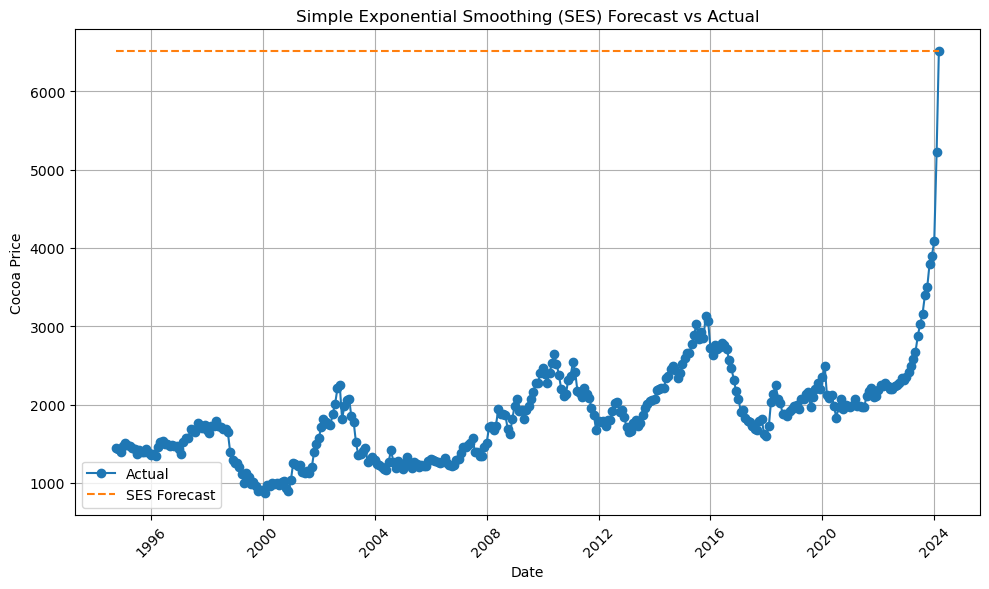

In [81]:
#Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Simple Exponential Smoothing model
ses_model = ExponentialSmoothing(df['Price'], trend=None, seasonal=None).fit()

# Forecast using the fitted model
ses_forecast_values = ses_model.forecast(len(df))

# Plot the SES forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, ses_forecast_values, label='SES Forecast', linestyle='--')
plt.title('Simple Exponential Smoothing (SES) Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


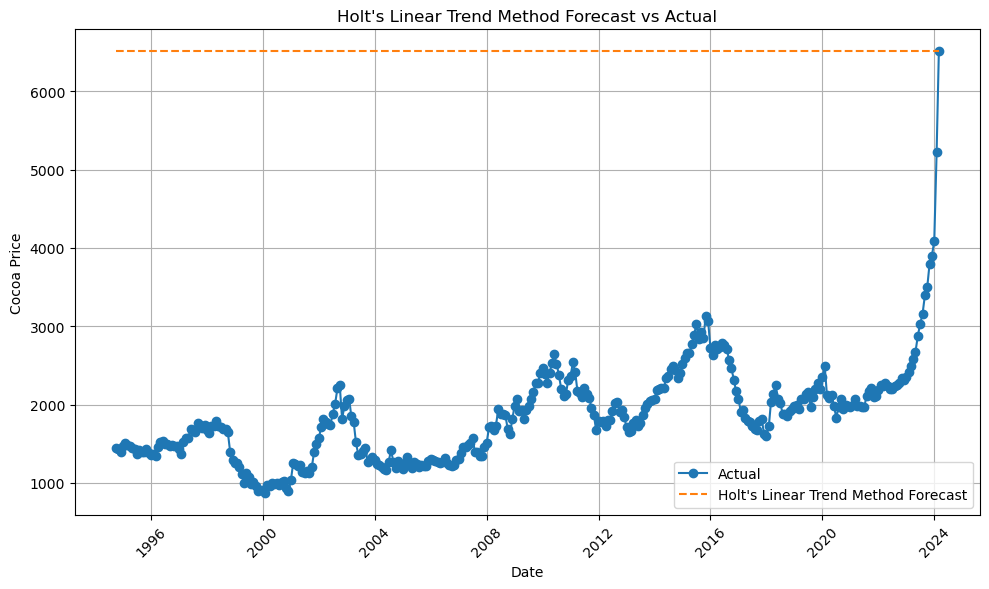

In [87]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear Trend method
holts_linear_model = ExponentialSmoothing(df['Price'], trend=None).fit()

# Forecast using the fitted model
holts_linear_forecast_values = holts_linear_model.forecast(len(df))

# Plot the Holt's Linear Trend method forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, holts_linear_forecast_values, label='Holt\'s Linear Trend Method Forecast', linestyle='--')
plt.title('Holt\'s Linear Trend Method Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


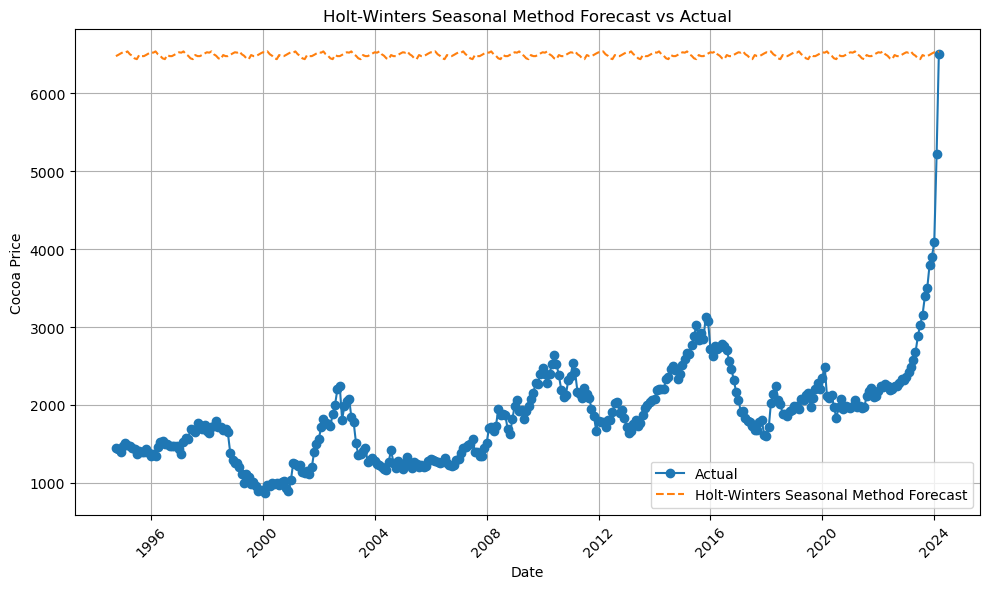

In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters seasonal method
holt_winters_model = ExponentialSmoothing(df['Price'], seasonal='add', seasonal_periods=12).fit()

# Forecast using the fitted model
holt_winters_forecast_values = holt_winters_model.forecast(len(df))

# Plot the Holt-Winters seasonal method forecast values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual', marker='o')
plt.plot(df.index, holt_winters_forecast_values, label='Holt-Winters Seasonal Method Forecast', linestyle='--')
plt.title('Holt-Winters Seasonal Method Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
time_series

Date
1994-10-01    1447.95
1994-11-01    1437.05
1994-12-01    1399.43
1995-01-01    1468.86
1995-02-01    1510.55
               ...   
2023-11-01    3799.15
2023-12-01    3897.04
2024-01-01    4087.54
2024-02-01    5226.12
2024-03-01    6510.16
Name: Price, Length: 354, dtype: float64

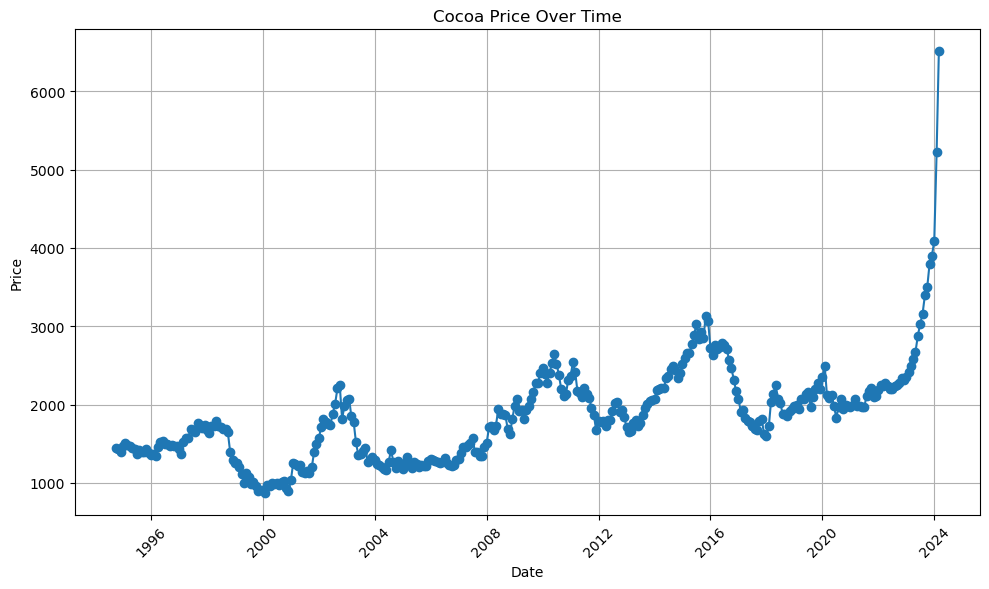

In [43]:
import matplotlib.pyplot as plt

# Assuming time_series is your time series object
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-')
plt.title('Cocoa Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# The following plot gets information from the data and plots the variation of cocoa prices over time

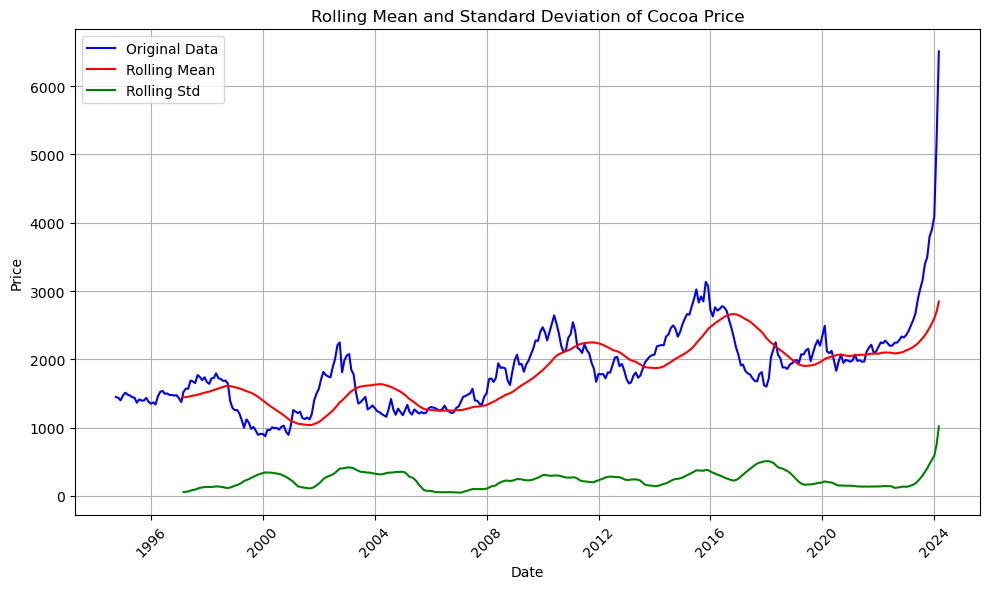

In [44]:
import matplotlib.pyplot as plt

# Define the window size for the rolling calculations
window_size = 30  # You can adjust this according to your preference

# Calculate rolling mean and rolling standard deviation
# Rolling mean calculates the moving averages at different points
rolling_mean = time_series.rolling(window=window_size).mean()
rolling_std = time_series.rolling(window=window_size).std()

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Original Data', color='blue')

# Plot the rolling mean
plt.plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean', color='red')

# Plot the rolling standard deviation
plt.plot(rolling_std.index, rolling_std.values, label='Rolling Std', color='green')

plt.title('Rolling Mean and Standard Deviation of Cocoa Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


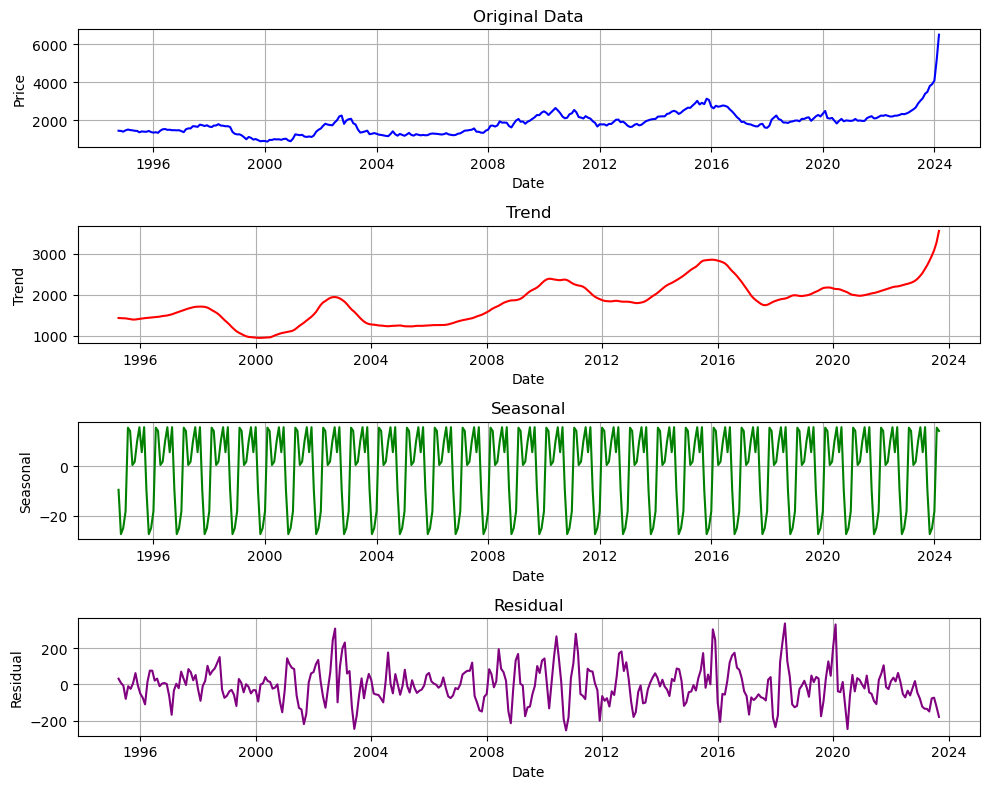

In [45]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using LOESS
decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Assuming seasonality period is 12 months

# Plot the decomposed components
plt.figure(figsize=(10, 8))

# Original time series data
plt.subplot(4, 1, 1)
plt.plot(time_series.index, time_series.values, label='Original Data', color='blue')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(time_series.index, decomposition.trend, label='Trend', color='red')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(time_series.index, decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

# Residual component
plt.subplot(4, 1, 4)
plt.plot(time_series.index, decomposition.resid, label='Residual', color='purple')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()


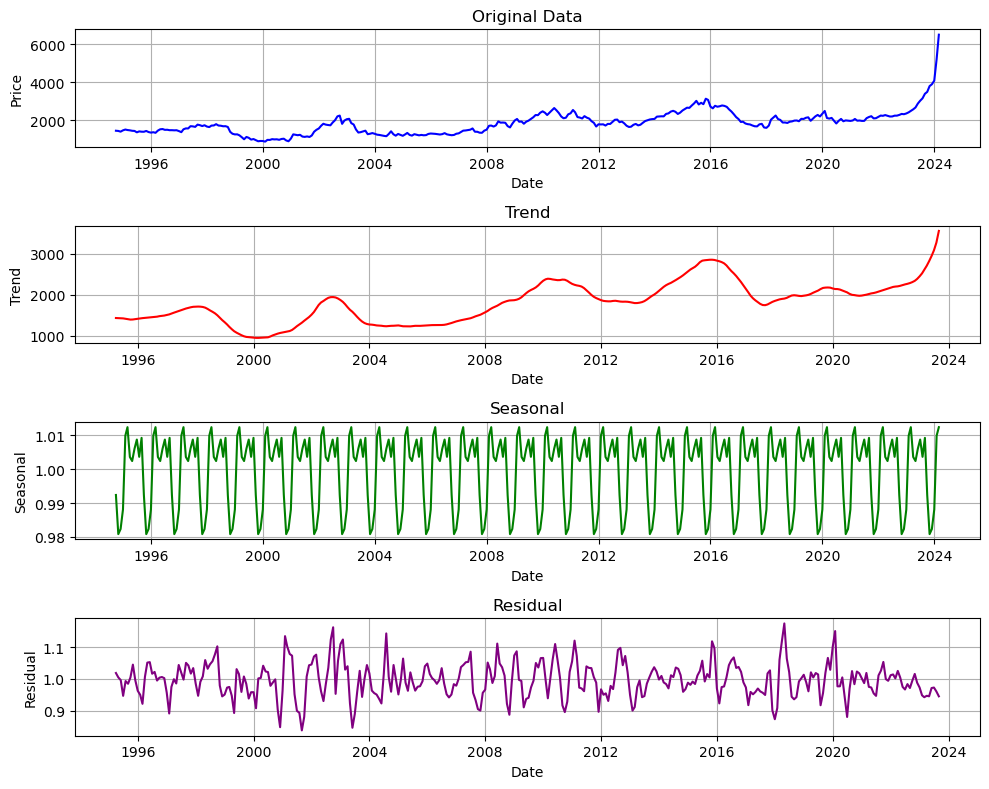

In [88]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using LOESS
decomposition = seasonal_decompose(time_series, model='multiplicative', period=12)  # Assuming seasonality period is 12 months

# Plot the decomposed components
plt.figure(figsize=(10, 8))

# Original time series data
plt.subplot(4, 1, 1)
plt.plot(time_series.index, time_series.values, label='Original Data', color='blue')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(time_series.index, decomposition.trend, label='Trend', color='red')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(time_series.index, decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

# Residual component
plt.subplot(4, 1, 4)
plt.plot(time_series.index, decomposition.resid, label='Residual', color='purple')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()


In [46]:
#ADF test is used to check for any stationarity present in the data
# the value of the ADF statistic should be less than 0.05 to prove that the data is stationary

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(time_series)

# Extract and print the test statistics
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if result[1] < 0.05:
    print('Reject the null hypothesis (H0): Time series is stationary.')
else:
    print('Fail to reject the null hypothesis (H0): Time series is non-stationary.')


ADF Statistic: 1.528717851494726
p-value: 0.9976271539962083
Critical Values:
	1%: -3.4493918438232525
	5%: -2.8699298018856574
	10%: -2.5712397066390458
Fail to reject the null hypothesis (H0): Time series is non-stationary.


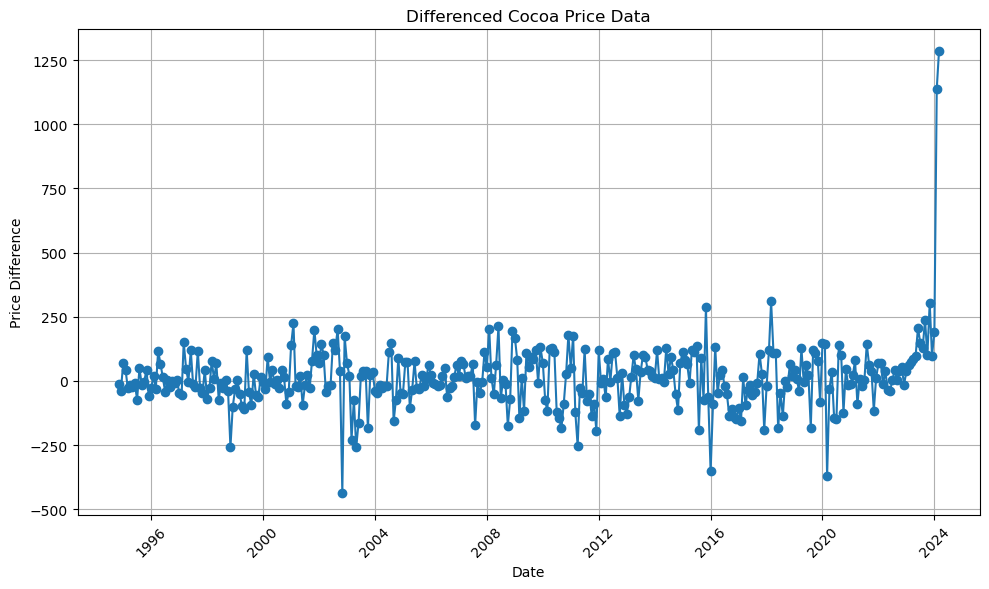

In [47]:
# Perform differencing on the time series data
#Now we will perform second differencing of the data because the data is sttill not stationary
differenced_data = time_series.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(differenced_data.index, differenced_data.values, marker='o', linestyle='-')
plt.title('Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
# Now checking for ADF test again to the differenced data to check whether the data is stationary
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on differenced data
result_diff = adfuller(differenced_data)

# Extract and print the test statistics
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if result_diff[1] < 0.05:
    print('Reject the null hypothesis (H0): Differenced time series is stationary.')
else:
    print('Fail to reject the null hypothesis (H0): Differenced time series is non-stationary.')


ADF Statistic: 0.07448145834557131
p-value: 0.9642750135031484
Critical Values:
	1%: -3.4493918438232525
	5%: -2.8699298018856574
	10%: -2.5712397066390458
Fail to reject the null hypothesis (H0): Differenced time series is non-stationary.


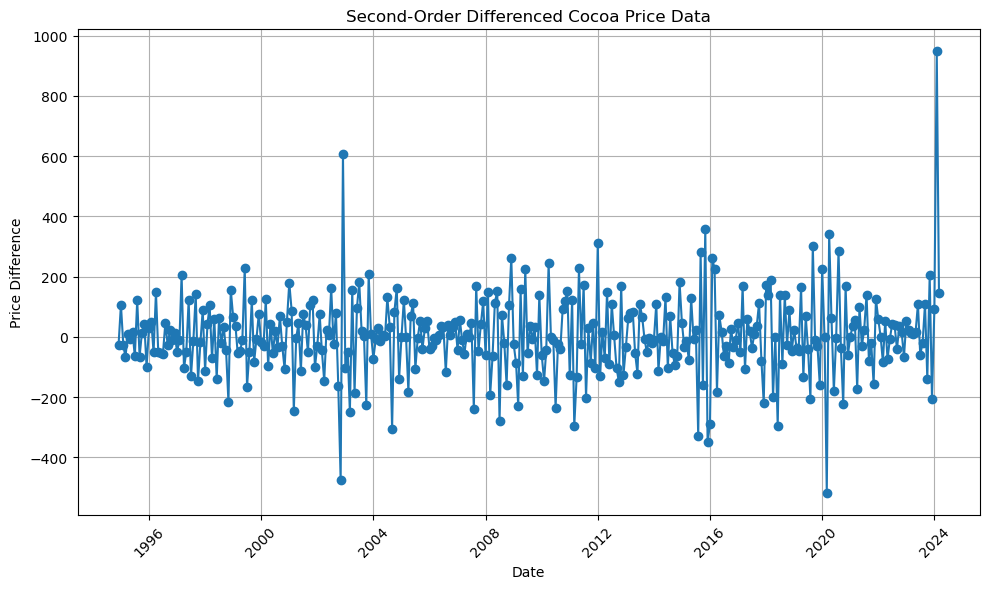

In [49]:
# Performing higher order referencing as the data is still non stationary

# Perform higher-order differencing on the time series data
second_order_diff = time_series.diff().diff().dropna()

# Plot the second-order differenced data
plt.figure(figsize=(10, 6))
plt.plot(second_order_diff.index, second_order_diff.values, marker='o', linestyle='-')
plt.title('Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
# Perform Augmented Dickey-Fuller test on second-order differenced data
result_second_order_diff = adfuller(second_order_diff)

# Extract and print the test statistics
print('ADF Statistic:', result_second_order_diff[0])
print('p-value:', result_second_order_diff[1])
print('Critical Values:')
for key, value in result_second_order_diff[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if result_second_order_diff[1] < 0.05:
    print('Reject the null hypothesis (H0): Second-order differenced time series is stationary.')
else:
    print('Fail to reject the null hypothesis (H0): Second-order differenced time series is non-stationary.')


ADF Statistic: -10.841824614684091
p-value: 1.6087080135309096e-19
Critical Values:
	1%: -3.4493918438232525
	5%: -2.8699298018856574
	10%: -2.5712397066390458
Reject the null hypothesis (H0): Second-order differenced time series is stationary.


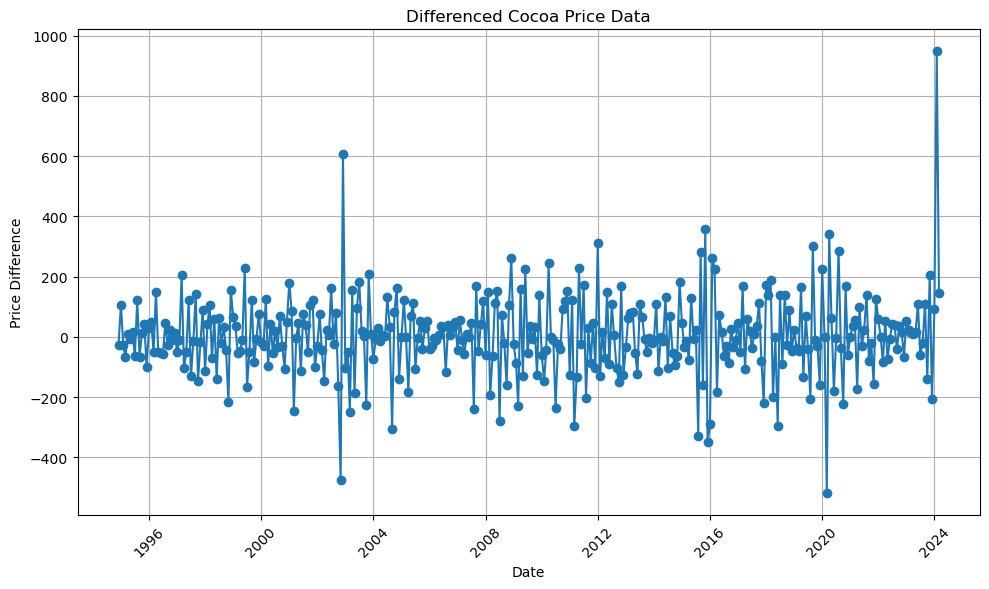

In [51]:
# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(second_order_diff.index, second_order_diff.values, marker='o', linestyle='-')
plt.title('Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
# Hence now the data is stationary

In [53]:
# ACF and PACF plots:

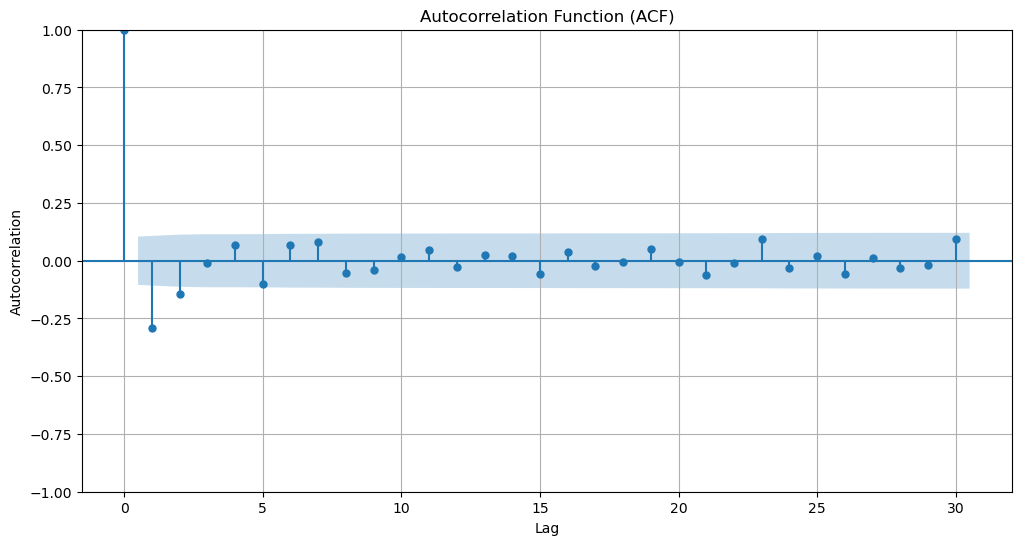

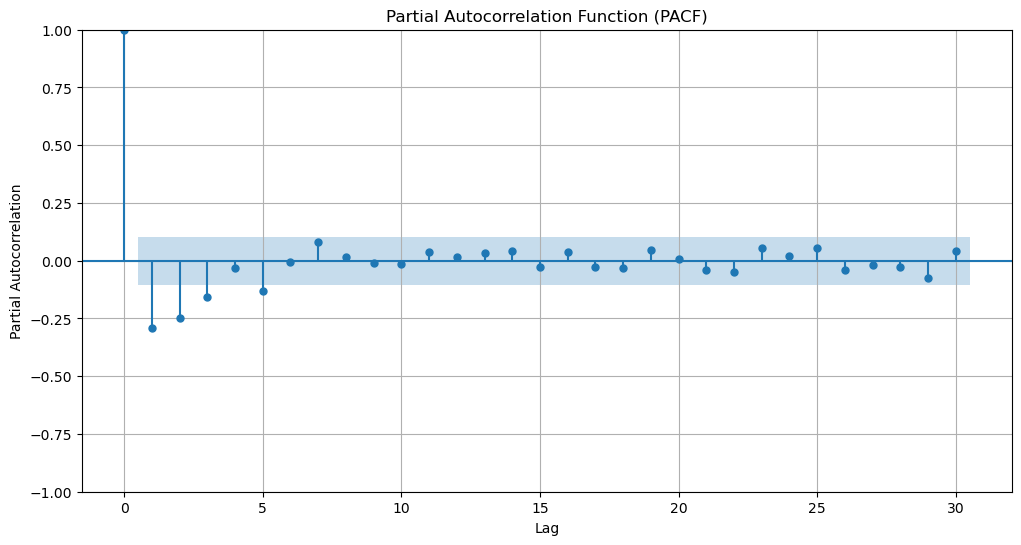

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(second_order_diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(second_order_diff, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


In [55]:
# Timeplot of differenced data

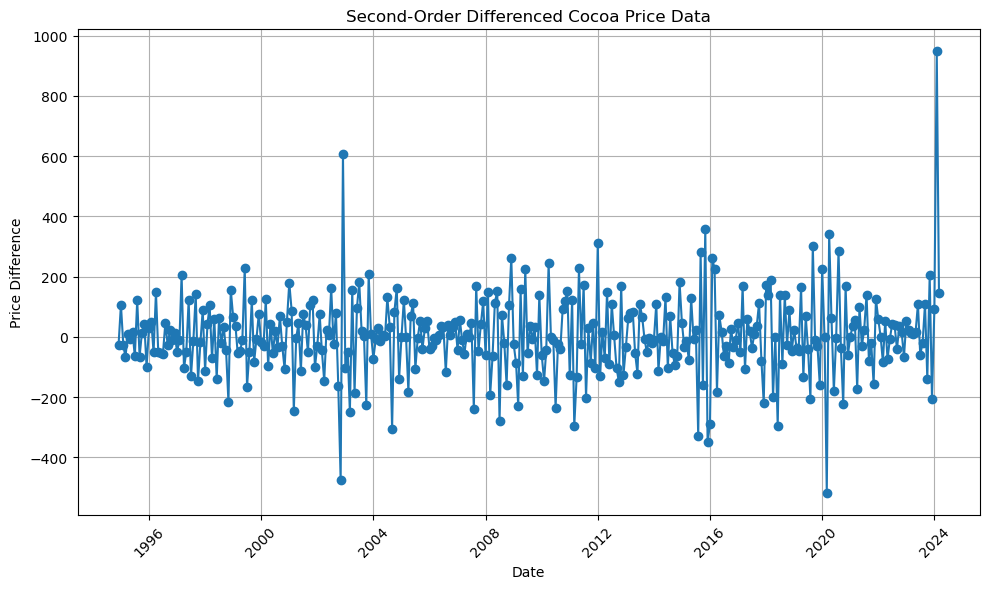

In [56]:
# Plot the time series data after second-order differencing
plt.figure(figsize=(10, 6))
plt.plot(second_order_diff.index, second_order_diff.values, marker='o', linestyle='-')
plt.title('Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


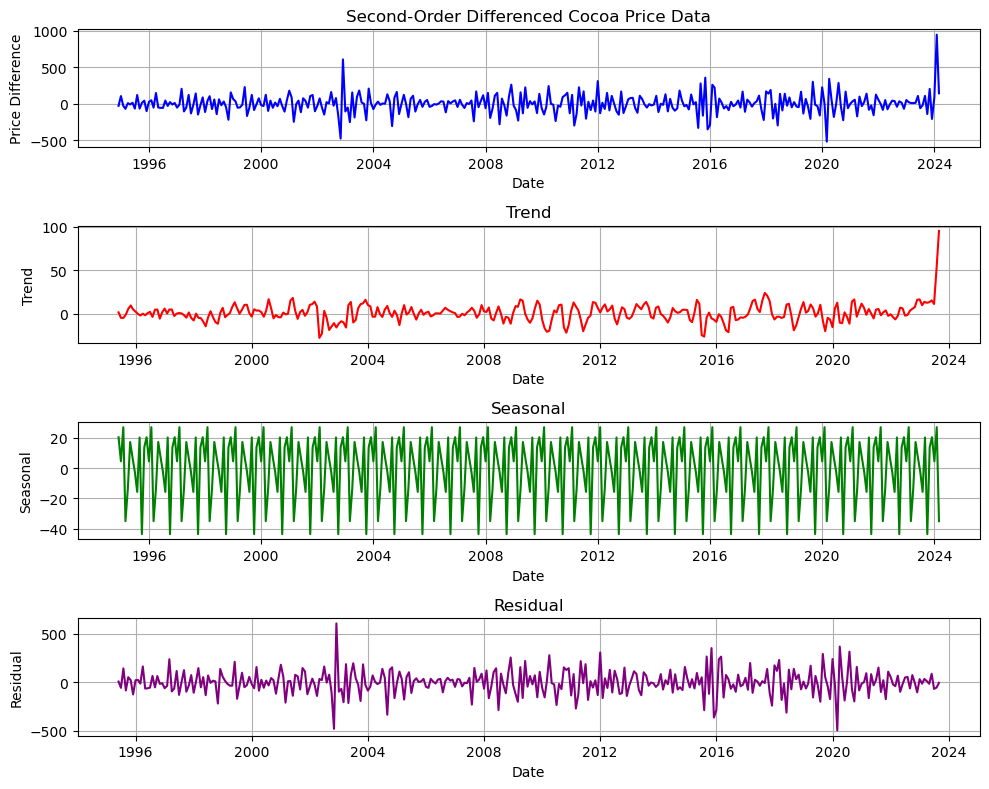

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using LOESS on the second-order differenced data
stl_decomposition = seasonal_decompose(second_order_diff, model='additive', period=12)  # Assuming seasonality period is 12 months

# Plot the STL decomposition
plt.figure(figsize=(10, 8))

# Original time series data
plt.subplot(4, 1, 1)
plt.plot(second_order_diff.index, second_order_diff.values, label='Second-Order Differenced Data', color='blue')
plt.title('Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(stl_decomposition.trend.index, stl_decomposition.trend.values, label='Trend', color='red')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(stl_decomposition.seasonal.index, stl_decomposition.seasonal.values, label='Seasonal', color='green')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

# Residual component
plt.subplot(4, 1, 4)
plt.plot(stl_decomposition.resid.index, stl_decomposition.resid.values, label='Residual', color='purple')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()


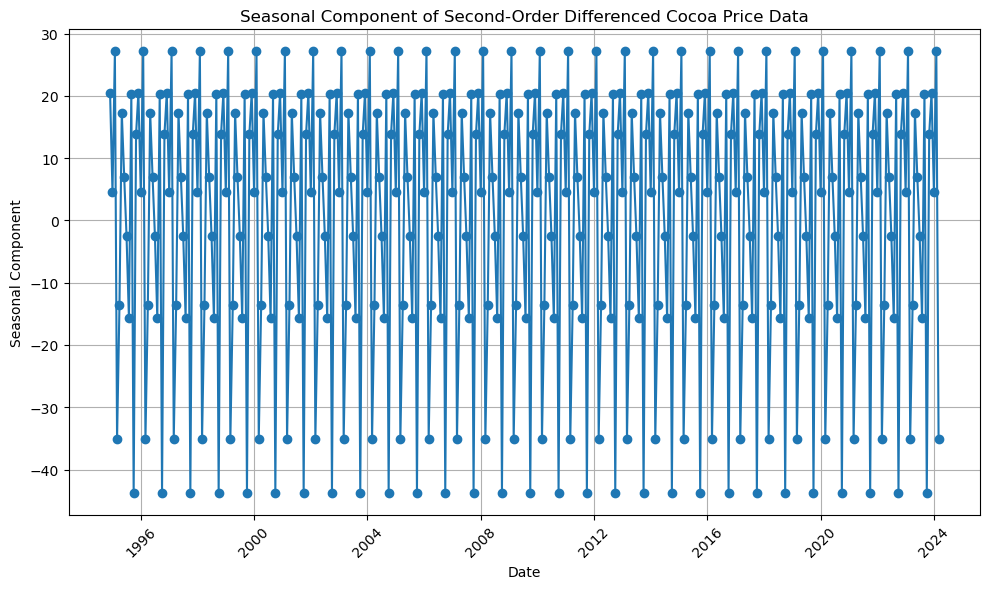

In [58]:
# Plot the seasonal component of the second-order differenced data
plt.figure(figsize=(10, 6))
plt.plot(stl_decomposition.seasonal.index, stl_decomposition.seasonal.values, marker='o', linestyle='-')
plt.title('Seasonal Component of Second-Order Differenced Cocoa Price Data')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
from pmdarima.arima import auto_arima

# Fit auto ARIMA model
auto_model = auto_arima(second_order_diff, seasonal=True, m=12, trace=True, suppress_warnings=True)

# Print the summary of the auto ARIMA model
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4466.340, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4439.123, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4398.885, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4464.594, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4396.989, Time=0.20 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=4398.882, Time=0.71 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4383.071, Time=0.43 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=4385.071, Time=0.89 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=4385.071, Time=1.12 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4437.152, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=4377.315, Time=0.51 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept

In [60]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order (p, d, q) for the ARIMA model
p, d, q = 2, 3, 2

# Fit the ARIMA model
arima_model = ARIMA(second_order_diff, order=(p, d, q)).fit()

# Print the summary of the ARIMA model
print(arima_model.summary())


C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  352
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -2280.460
Date:                Mon, 29 Apr 2024   AIC                           4570.920
Time:                        00:45:18   BIC                           4590.196
Sample:                    12-01-1994   HQIC                          4578.593
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8368      0.046    -18.329      0.000      -0.926      -0.747
ar.L2         -0.4600      0.037    -12.587      0.000      -0.532      -0.388
ma.L1         -2.0000      0.056    -35.839      0.0

In [61]:
# Split the data into training and test sets
train_data = second_order_diff.loc[:'2023-09-30']
test_data = second_order_diff.loc['2023-10-01':'2024-03-31']

# Fit an ARIMA model to the training set
p, d, q = 2, 3, 2
arima_model = ARIMA(train_data, order=(p, d, q)).fit()

# Forecast the average prices for the test set
forecast_values = arima_model.forecast(steps=len(test_data))[0]

# Evaluate the forecasts against the actual data for the test period
forecast_index = test_data.index
actual_values = test_data.values

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Percentage Error (MAPE): 102.83%
